In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Mood classification using cnn

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [3]:
img =image.load_img(r"D:\NIT 10AM\Notes\05 May\19. CNN - Happy  or Sad\training\happy\2.jpg")

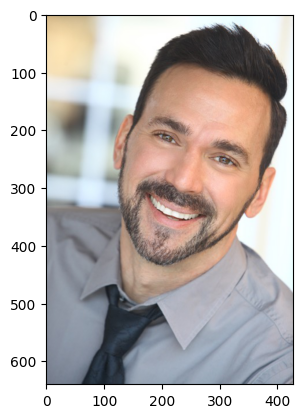

In [4]:
plt.imshow(img)

In [5]:
i1=cv2.imread(r"D:\NIT 10AM\Notes\05 May\19. CNN - Happy  or Sad\training\happy\2.jpg")
i1

array([[[129, 175, 199],
        [129, 175, 199],
        [129, 175, 199],
        ...,
        [235, 240, 239],
        [236, 241, 240],
        [238, 241, 239]],

       [[131, 177, 201],
        [131, 177, 201],
        [131, 177, 201],
        ...,
        [235, 240, 239],
        [236, 241, 240],
        [239, 242, 240]],

       [[133, 179, 203],
        [133, 179, 203],
        [133, 179, 203],
        ...,
        [236, 241, 240],
        [236, 241, 240],
        [239, 242, 240]],

       ...,

       [[139, 123, 116],
        [140, 124, 117],
        [140, 124, 117],
        ...,
        [141, 135, 136],
        [147, 141, 142],
        [153, 147, 148]],

       [[138, 122, 115],
        [139, 123, 116],
        [140, 124, 117],
        ...,
        [148, 142, 143],
        [156, 150, 151],
        [163, 157, 158]],

       [[138, 122, 115],
        [139, 123, 116],
        [139, 123, 116],
        ...,
        [155, 149, 150],
        [162, 156, 157],
        [166, 160, 161]]

In [6]:
i1.shape

(640, 427, 3)

In [7]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset= train.flow_from_directory(r'D:\NIT 10AM\Notes\05 May\19. CNN - Happy  or Sad\training',
                                       target_size= (200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory(r'D:\NIT 10AM\Notes\05 May\19. CNN - Happy  or Sad\validation',
                                                 target_size=(200,200),
                                                 batch_size=3,
                                                 class_mode='binary')


Found 9 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [11]:
validation_dataset.class_indices

{'happy': 0, 'sad': 1}

In [12]:
validation_dataset.classes

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   
                                   tf.keras.layers.Dense(512,activation='relu'),
                                    
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ]
                                  )

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

C:\Users\bhanu\anaconda3\envs\tensorflow_env\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 5s 932ms/step - loss: 9.3934 - accuracy: 0.5556 - val_loss: 0.6963 - val_accuracy: 0.5556
Epoch 2/10
3/3 [==============================] - 2s 546ms/step - loss: 1.0333 - accuracy: 0.6667 - val_loss: 0.3325 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 2s 648ms/step - loss: 0.6591 - accuracy: 0.7778 - val_loss: 0.2843 - val_accuracy: 0.8889
Epoch 4/10
3/3 [==============================] - 2s 704ms/step - loss: 0.1954 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 2s 645ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 0.3073 - val_accuracy: 0.8889
Epoch 6/10
3/3 [==============================] - 1s 424ms/step - loss: 0.5000 - accuracy: 0.8889 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 462ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

In [16]:
dir_path = r'D:\NIT 10AM\Notes\05 May\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    print(i)

0340d814344945e1aca448c5ad397795.webp
1200x0.jpg
2.jpg
3.jpg
a.jpg
d.jpg
f.webp
GettyImages-857975554.jpg
image.jpg
k.jpg
s.jpg


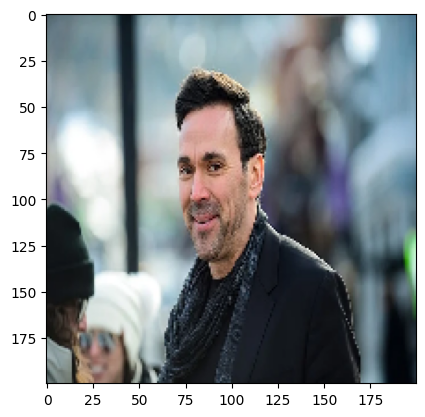

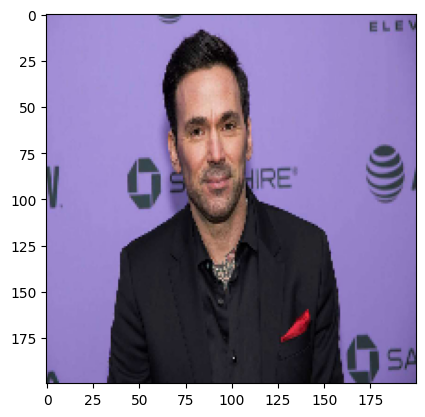

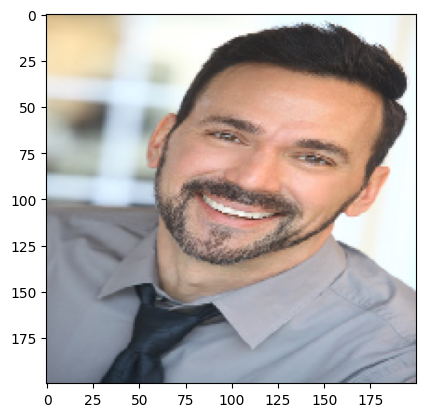

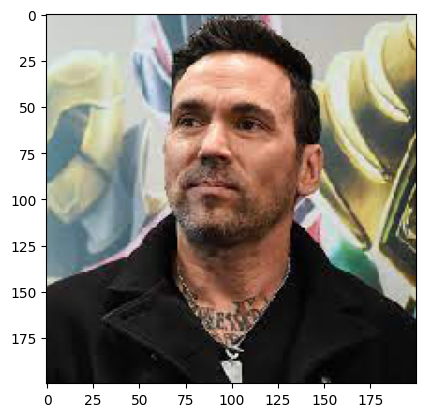

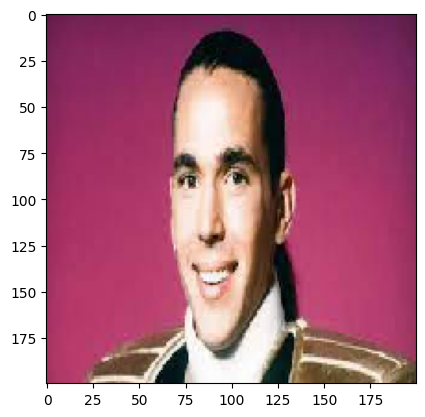

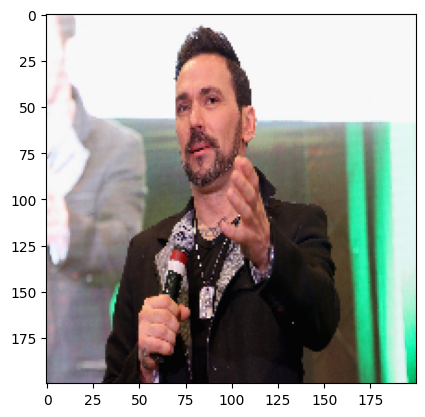

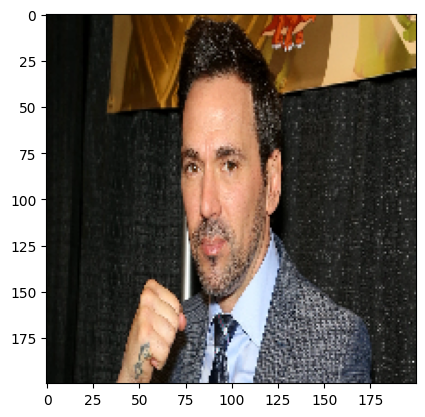

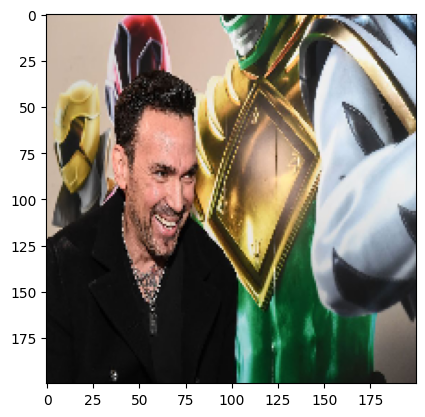

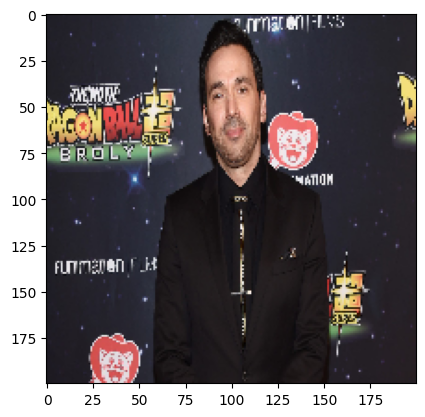

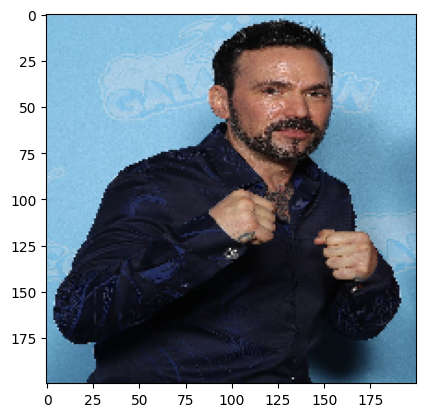

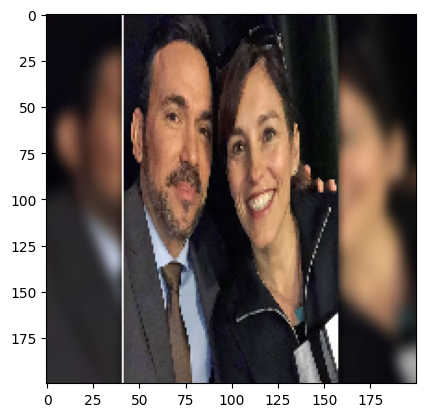

In [17]:
dir_path = r'D:\NIT 10AM\Notes\05 May\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

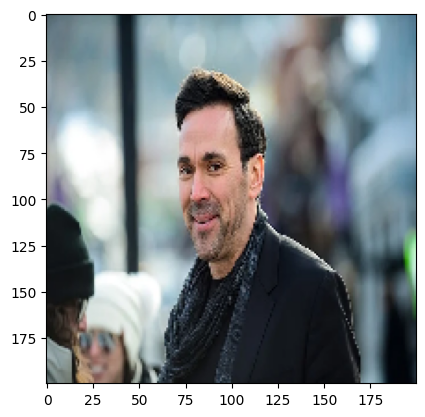

1/1 [==============================] - 0s 238ms/step
i am sad


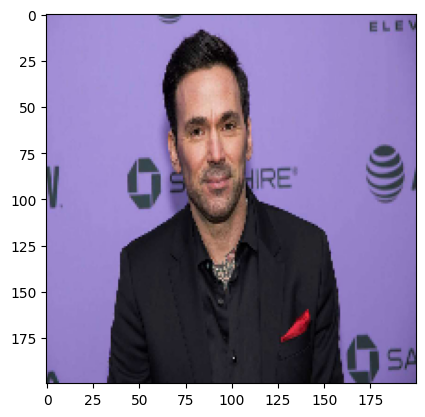

1/1 [==============================] - 0s 99ms/step
i am sad


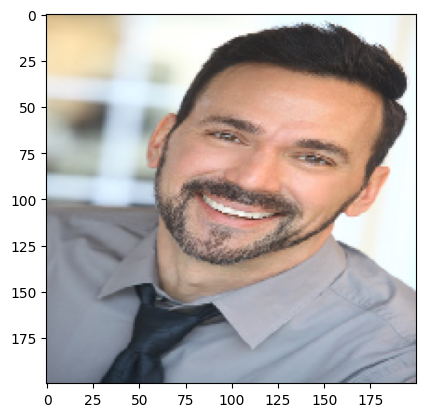

1/1 [==============================] - 0s 50ms/step
 i am  happy


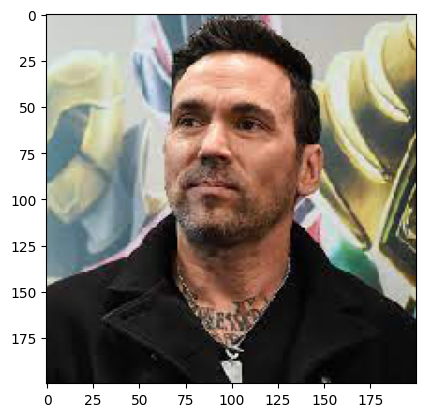

1/1 [==============================] - 0s 41ms/step
i am sad


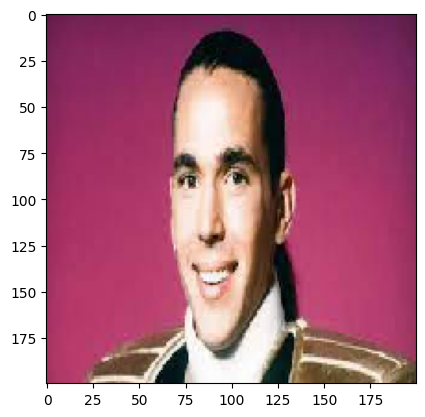

1/1 [==============================] - 0s 52ms/step
 i am  happy


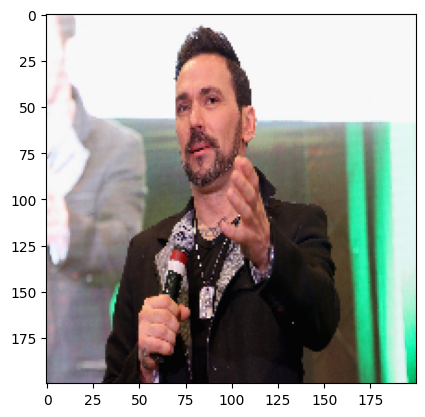

1/1 [==============================] - 0s 71ms/step
i am sad


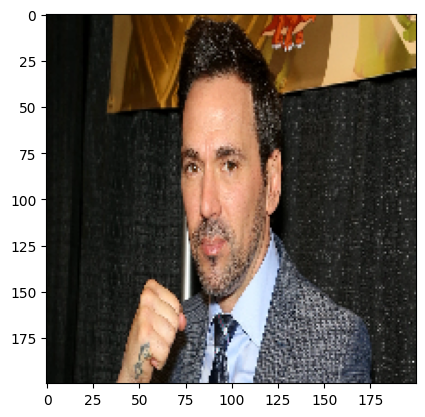

1/1 [==============================] - 0s 75ms/step
 i am  happy


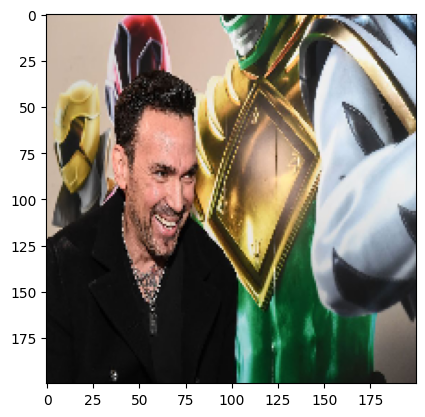

1/1 [==============================] - 0s 56ms/step
 i am  happy


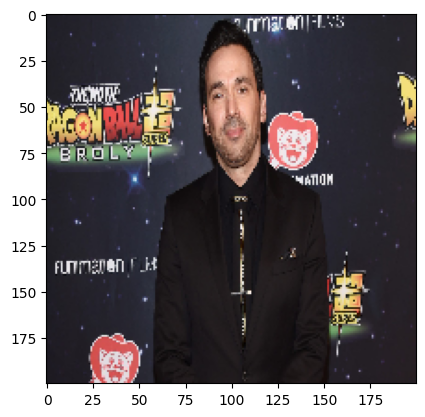

1/1 [==============================] - 0s 55ms/step
i am sad


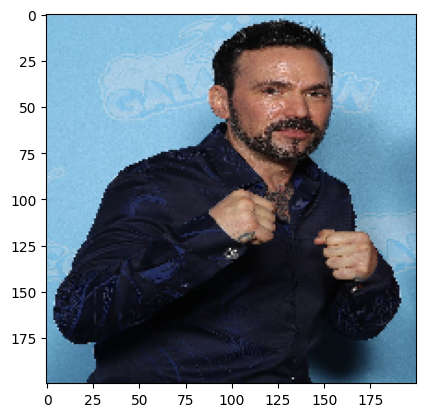

1/1 [==============================] - 0s 57ms/step
i am sad


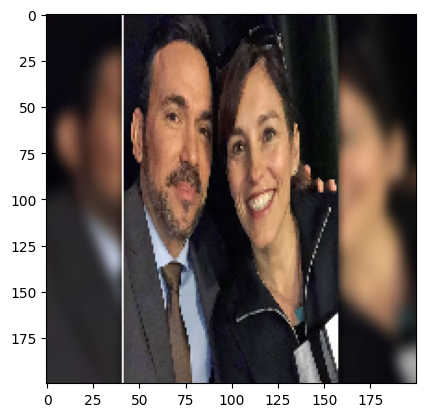

1/1 [==============================] - 0s 62ms/step
 i am  happy


In [18]:
dir_path = r'D:\NIT 10AM\Notes\05 May\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am  happy')
    else:
        print('i am sad')